# How to turn Text into Features

In [2]:
from IPython.display import Image

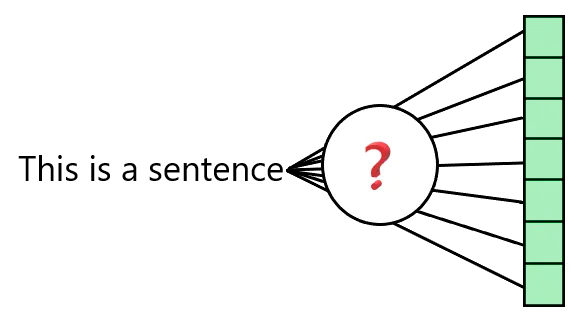

In [4]:
Image('../../Images/textofeatures.png')

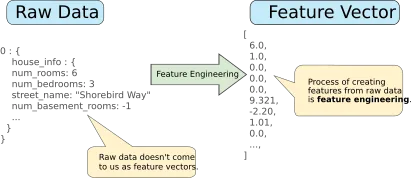

In [8]:
Image('../../Images/tabularFeatures.png',width=800)

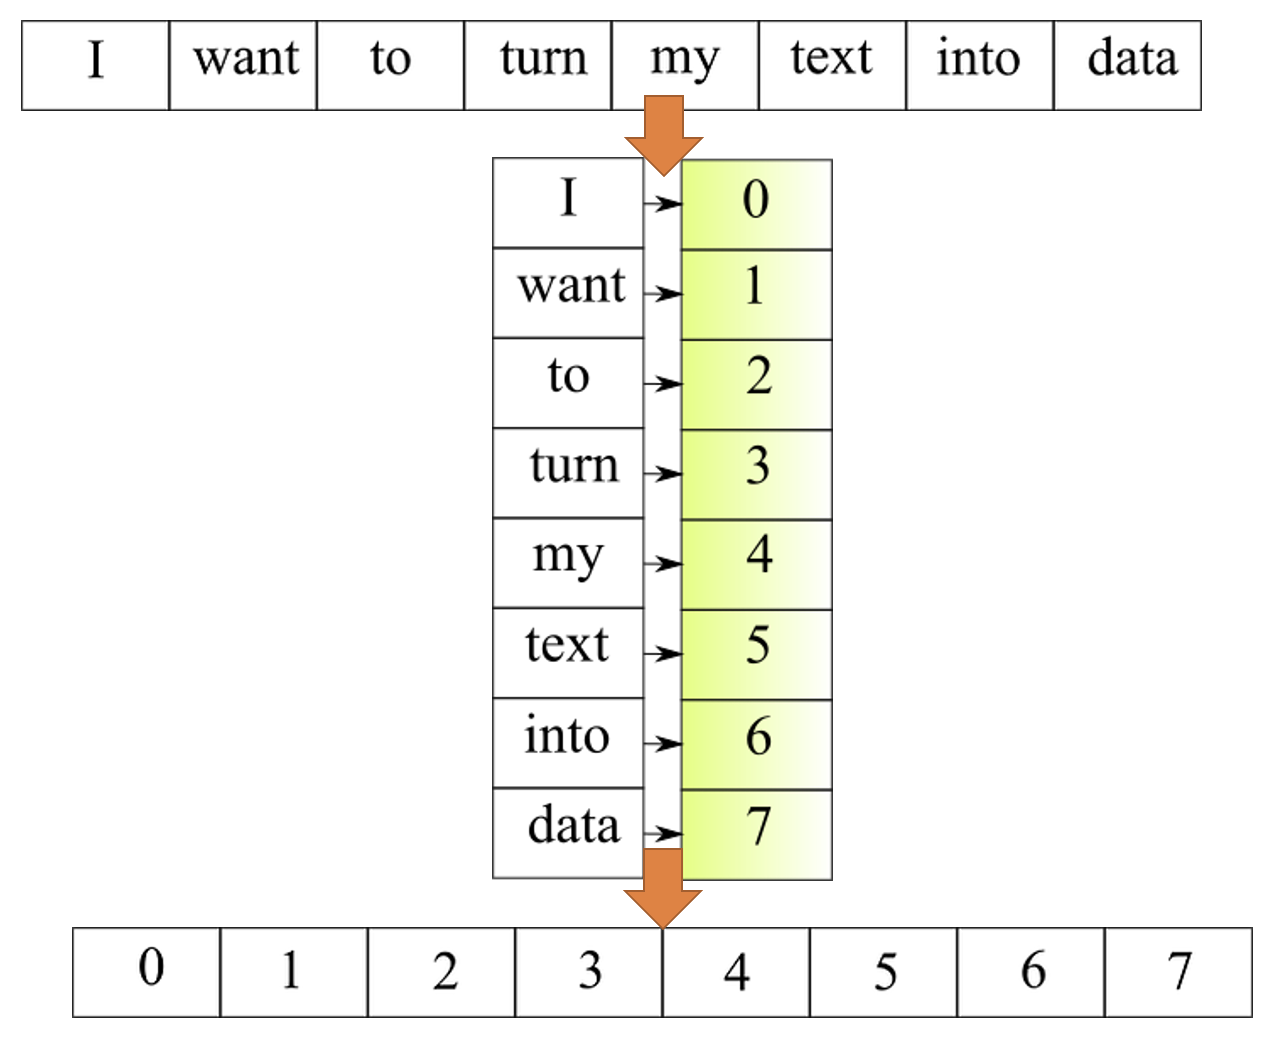

In [12]:
Image('../../Images/features_4.png',width=500)

## Problem?

*Does the data suggest that the term "my" holds more significance than "want" for a Machine Learning Algorithm?  <br><br>
*The Machine Learning Algorithm does not distinguish whether a number is an index or a value to be computed, although it may have categorical features which will be discussed later.

*What should we do?<br>

### Normalize!

* But how? These are not values! They are indices

### One Hot Encoding to save the day!

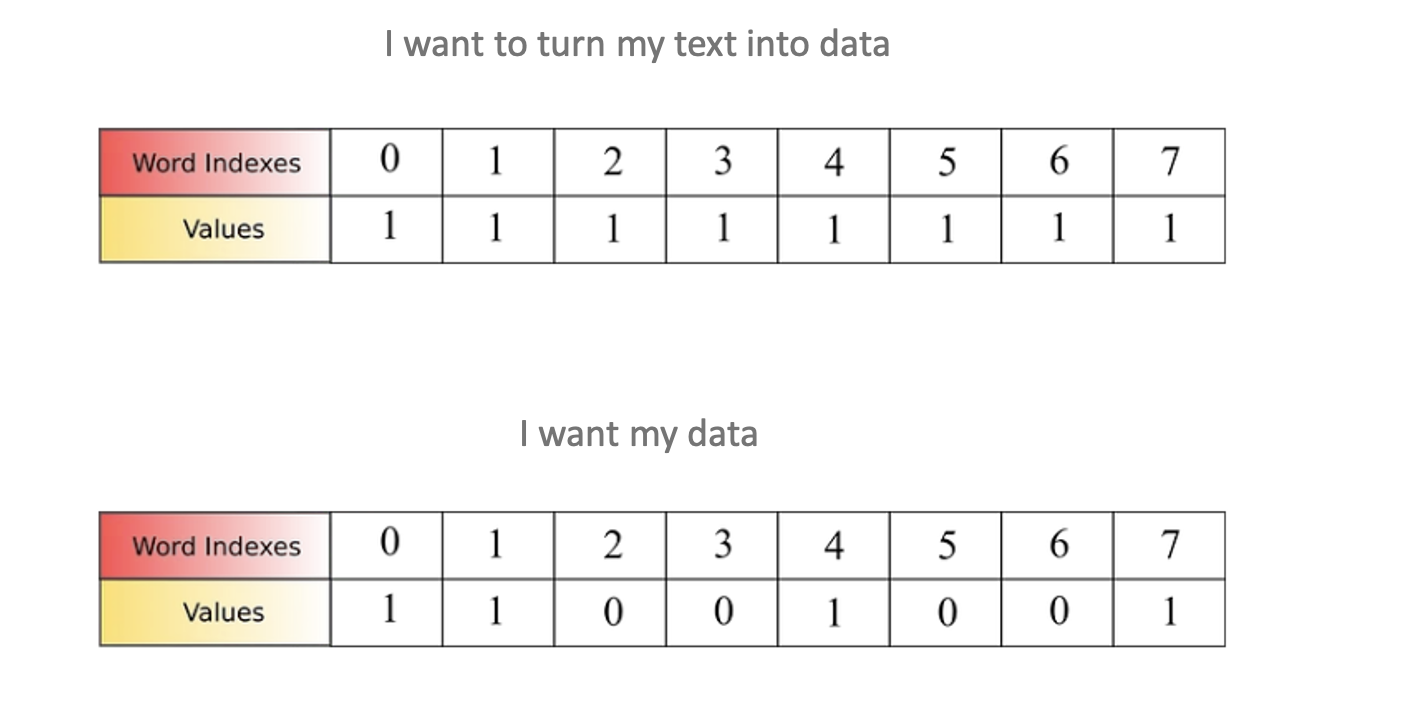

In [14]:
Image('../../Images/features_5.png',width=600)

## Lets make a very simple document similarity model

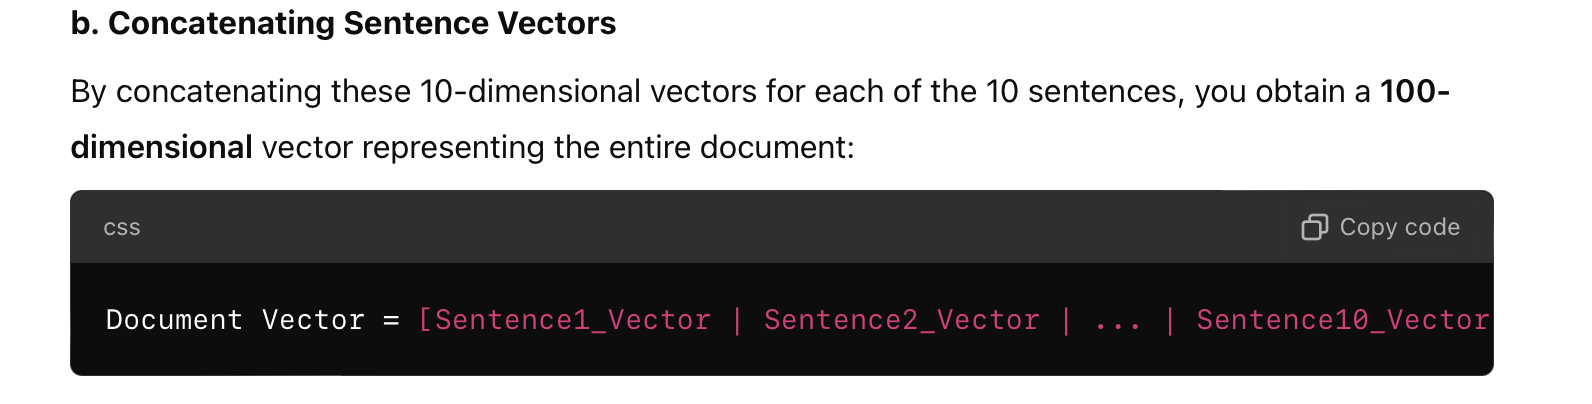

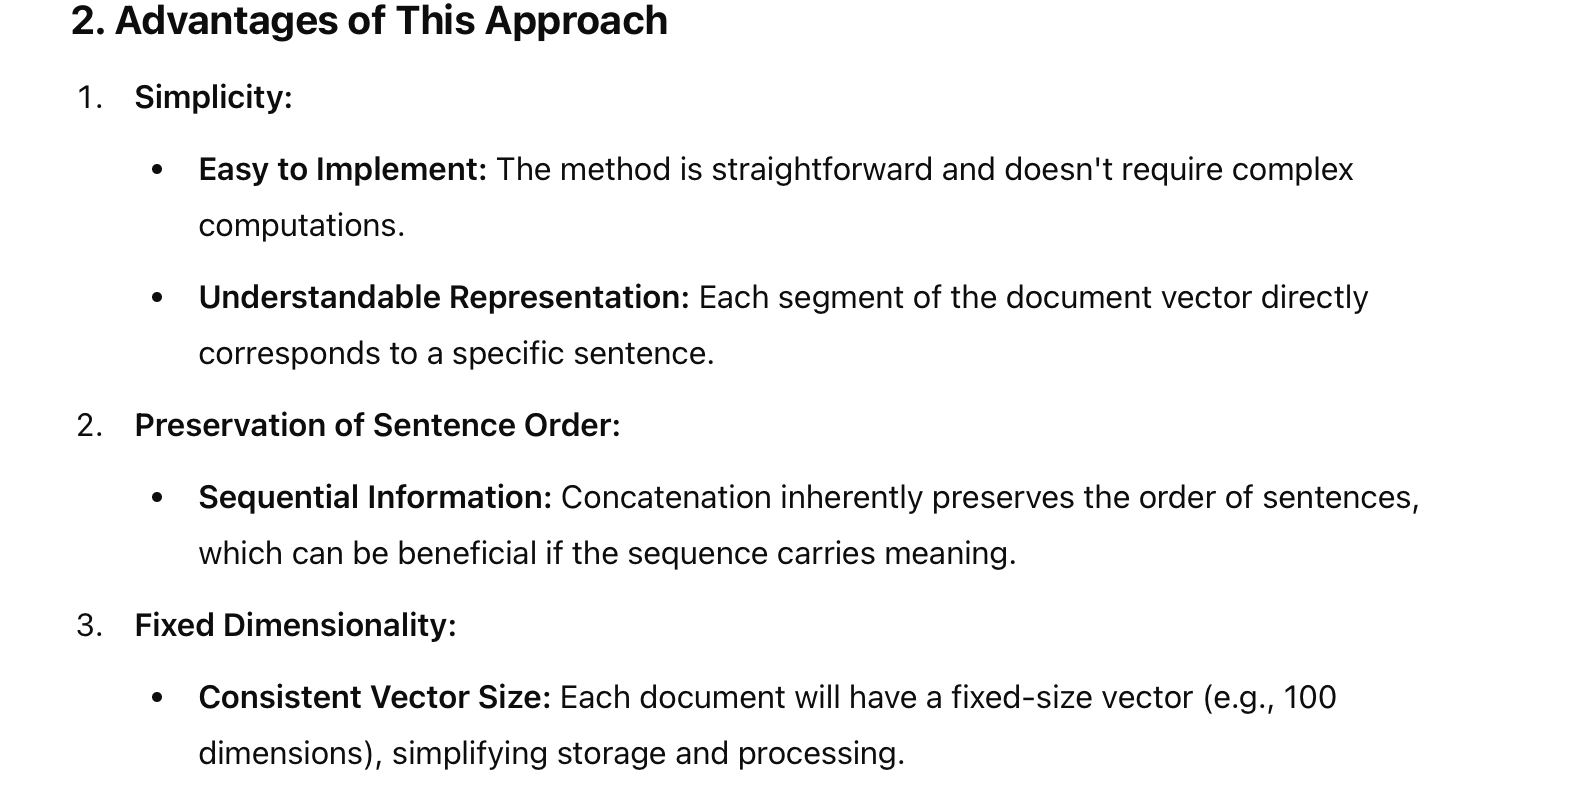

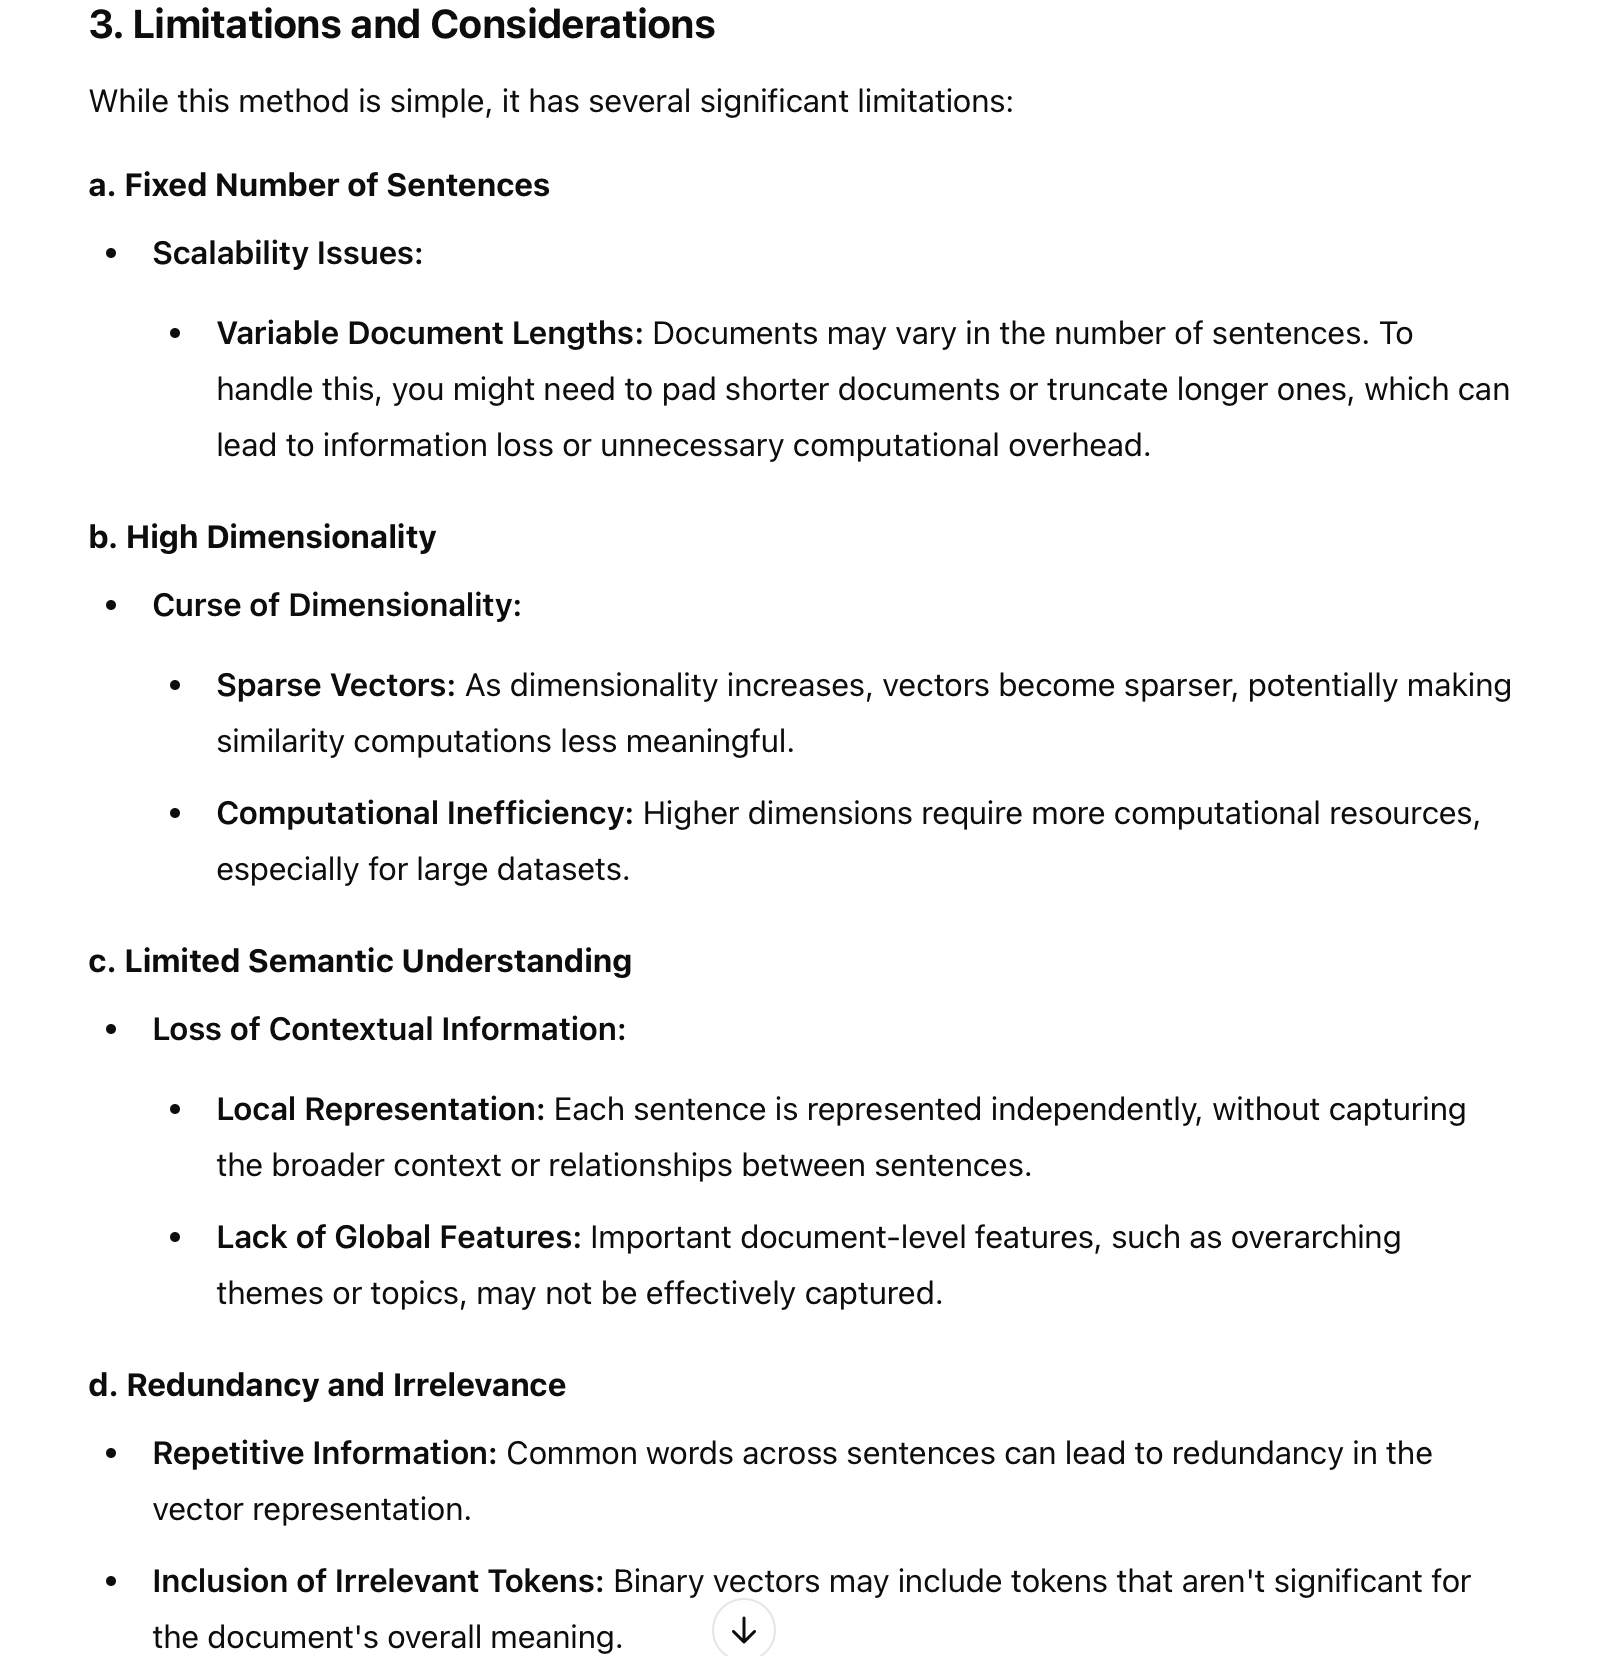

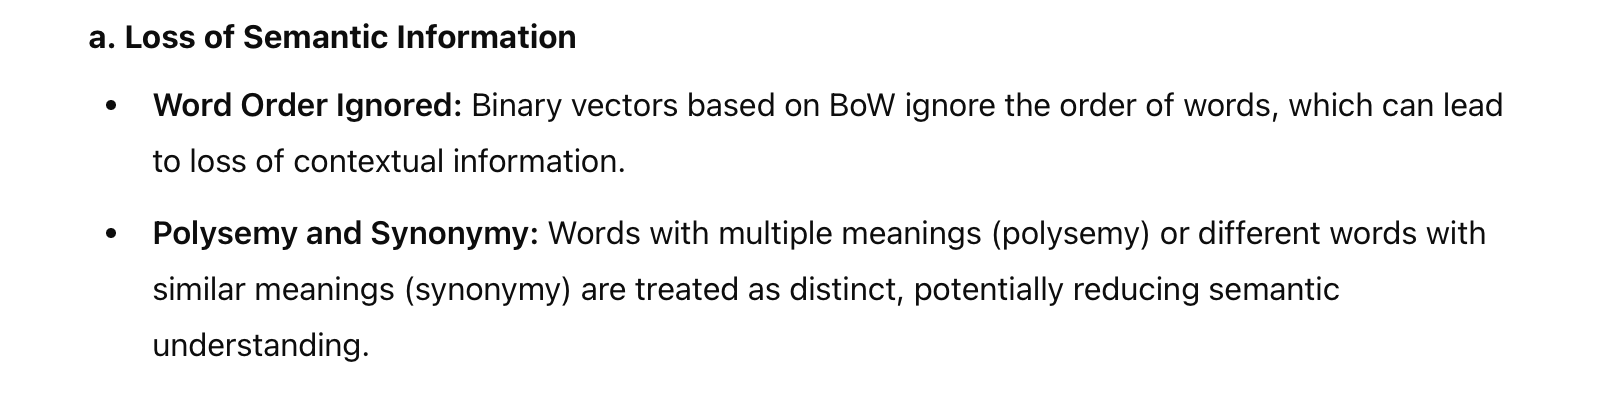

## Ok Lets Start

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
tqdm.pandas()
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
from nltk import tokenize

import numpy as np
import pandas as pd
import string
import re
import nltk
  
from nltk.corpus import stopwords  
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv('../../Data/cleanedJobs.csv')

data.head(2)

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,categorical_label,Length,Word_count,mean_word_length,mean_sent_length,Clean
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,1,126,1,126.0,126.0,3464105346410534641053464105346410534641053464...
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,1,111,5,21.4,111.0,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...


In [3]:
data = data[['Clean','categorical_label']]
print(data.shape)
data.head(2)

(15000, 2)


,Clean,categorical_label
0,3464105346410534641053464105346410534641053464...,1
1,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, roc_auc_score

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data['Clean'].values.astype('U'), 
                                                    data['categorical_label'], 
                                                    test_size=0.1, 
                                                    random_state=42,
                                                    stratify=data['categorical_label'])

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(13500,) (1500,) (13500,) (1500,)


## 1 - Bag of word model based on word ngrams

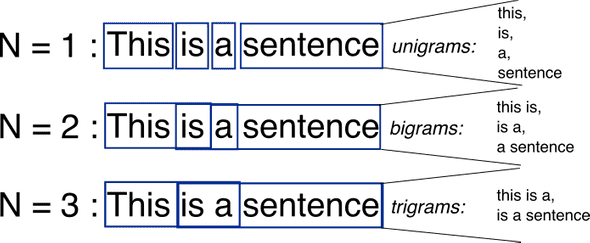

In [40]:
Image('../../Images/ngrams.png')

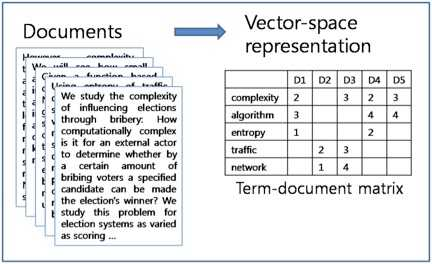

In [41]:
Image('../../Images/tfidf.png',width=600)

### Problem with Bag of Words
### 1. It does not take into account the semantic meaning of the word
### 2. It does not take into account the order of the words !!!
### 3. It does not take into account the context of the words
### 4. It does not take into account the frequency of the words
### 5. Can be Very High Dimensional !!!

## 2 - TF-IDF

In TF-IDF Model, instead of storing the frequency of words, we store the result of the tf-idf algorithm over the input data. <br><br>
<b>TF<b> stands for Term Frequency and IDF stands for Inverse Document Frequency.

### ->In short, TF-IDF computes the weight of a word in a specific document, taking into account the overall distribution of words.<br><br>

### ->The way the results are presented is the same as Bag of Words: a sparse vector (0’s for words that does not appear, some float otherwise).

Tf ve IDF tanımları yapılacak

In [16]:
vectorizer_word = TfidfVectorizer(max_features=40000,
                             min_df=5, 
                             max_df=0.5, 
                             analyzer='word', 
                            # stop_words='english', 
                             ngram_range=(1, 2))

vectorizer_word.fit(x_train)

tfidf_matrix_word_train = vectorizer_word.transform(x_train)
tfidf_matrix_word_test = vectorizer_word.transform(x_test)

CountVectorizer ->> Sadece term frequency hesaplar 

In [17]:
lr_word = LogisticRegression(solver='sag', verbose=2)
lr_word.fit(tfidf_matrix_word_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.12170340
Epoch 3, change: 0.05764714
Epoch 4, change: 0.02843565
Epoch 5, change: 0.03281881
Epoch 6, change: 0.02073405
Epoch 7, change: 0.01334310
Epoch 8, change: 0.00916773
Epoch 9, change: 0.00834223
Epoch 10, change: 0.00289770
Epoch 11, change: 0.00297103
Epoch 12, change: 0.00552798
Epoch 13, change: 0.00039125
Epoch 14, change: 0.00409435
Epoch 15, change: 0.00130927
Epoch 16, change: 0.00058496
Epoch 17, change: 0.00045441
Epoch 18, change: 0.00015124
convergence after 19 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(solver='sag', verbose=2)

In [18]:
y_pred_word = lr_word.predict(tfidf_matrix_word_test)
print(accuracy_score(y_test, y_pred_word))

0.9313333333333333


## HOMEWORK

TfIDF vectorizer ile CountVectorizer arasındaki fark nedir?
TFIDF yerine yukarıdaki kodda CountVectorizer kullannırsak ne olur?